In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Sample signals and template for matching

# 1-D
sig_1d =  [1, 0, 0, -1, 1, 0, -1, -1, 1, 0, 0, 1, -1]
template_1d = [0, -1, -1, 0]

# 2-D
sig_2d = [[1, 2, 0, -1, 1, 2, -1, -1, -2, 0, 0, 1, 0],
          [0, 0, 1, 1, 2, 0, -1, 1, -1, 1, 0, 2, -1],
          [1, 1, 0, 1, -1, 2, 0, 1, 2, 0, 0, 1, -1],
          [0, 3, 1, 1, -2, 0, -1, 1, -1, 1, 1, 2, 0]]
template_2d = [[1, 0],
           [3, 1]]

In [3]:
def find_match(t , s):
    #  signal.correlate gets the result of convolution between s and t
    corr = signal.correlate(s, t)
    index = np.argmax(corr)
    if index > len(s):
        div = index // np.array(s).shape[1]
        if div >= 1:
            index = '({},{})'.format(div, index - div*np.array(s).shape[1]-1)
    list_corr = "Correlation Matrix:\n{}".format(corr)
    return list_corr + '\n' + 'Index: {}'.format(index)

In [4]:
# The index where the template matches is where the highest correlation value is
# In this case, index = 8 of the correlation matrix
print(find_match(template_1d, sig_1d))

Correlation Matrix:
[ 0 -1 -1  0  1  0 -1  1  2  0 -1  0 -1  0  1  0]
Index: 8


In [5]:
# The index where the highest correlation happens at index (3, 4) with a value of 11
print(find_match(template_2d, sig_2d))

Correlation Matrix:
[[ 1  5  6 -1 -2  5  5 -4 -5 -6  0  1  3  0]
 [ 0  1  3  4  4  7  1 -3  1 -4  3  2  6 -3]
 [ 1  4  3  2  3  1  6  0  6  5  1  1  4 -4]
 [ 0  4 11  4  2 -7  1 -2  3  0  4  5  7 -1]
 [ 0  0  3  1  1 -2  0 -1  1 -1  1  1  2  0]]
Index: (3,4)


In [6]:
# Now, let's do it with images

dogs = cv2.imread("../images/dogs.jpg", cv2.IMREAD_COLOR)

In [7]:
# To convert BGR to RGB
def to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

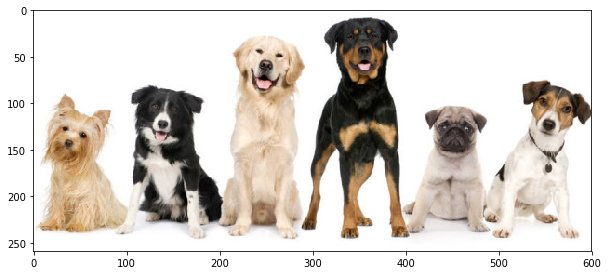

In [8]:
plt.figure(figsize=(10,5))
plt.imshow(to_rgb(dogs))

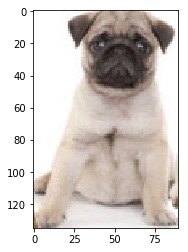

In [9]:
# We extract a template from the image
pug = dogs[105:240, 400:490]
plt.imshow(to_rgb(pug))

In [10]:
def template_matching(template, image):
    #Different methods for comparison
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
                'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    
    for i, method in enumerate(methods):
        image_x = image.copy() # We need a copy because we draw a rectangle to the image
        correlation = cv2.matchTemplate(image, template, eval(method))
        _, _, min_loc, max_loc = cv2.minMaxLoc(correlation)
 
        # For TM_SQDIFF or TM_SQDIFF_NORMED, take minimum value
        if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
            top_left = min_loc
        else:
            top_left = max_loc
        # bottom_right = (X start point + width, Y start point + height)
        bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

        # Draw Rectangle cv2.rectangle(image,start pos, end pos, color, thickness)
        cv2.rectangle(image_x,top_left, bottom_right, 255, 3)

        plt.figure(figsize=(10,10))
        
        plt.subplot(121)
        plt.imshow(correlation)
        plt.title(method), plt.xticks([]), plt.yticks([])
        
        plt.subplot(122)
        plt.imshow(to_rgb(image_x))
        plt.xticks([]), plt.yticks([])

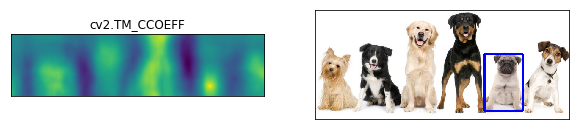

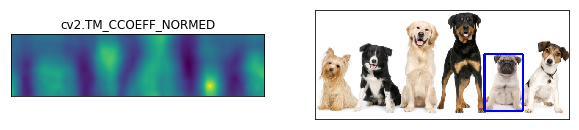

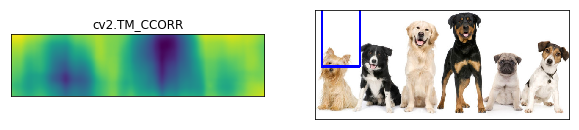

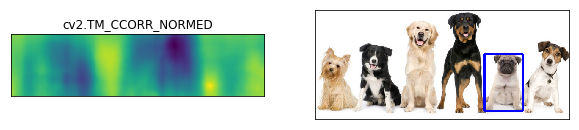

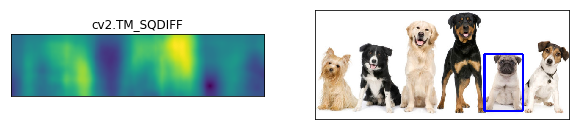

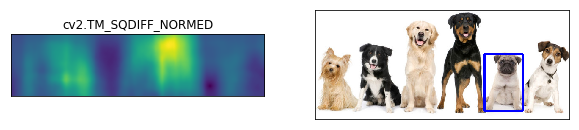

In [11]:
template_matching(pug, dogs)

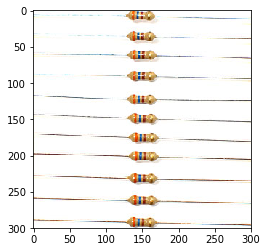

In [12]:
# Multiple objects matched

resistors = cv2.imread('../images/resistors.jpg', cv2.IMREAD_COLOR)
plt.imshow(to_rgb(resistors))

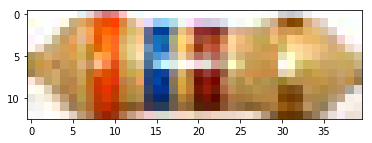

In [13]:
# Extract a template

resistor_template = resistors[55:68,130:170]
plt.imshow(to_rgb(resistor_template))

In [14]:
def template_matching_x(template, img, threshold):
    #Threshold value is how sensitive it should match the image
    
    image = img.copy()
    
    #Convert images to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    correlation = cv2.matchTemplate(image_gray,template, cv2.TM_CCOEFF_NORMED)
    
    # Extracting width and height information for drawing a rectangle
    width, height = template.shape[::-1]

    # This returns the point at which the template matches above a certain threshold
    matches = np.where( correlation >= threshold)
    
    for match in zip(*matches[::-1]):
        # Draw Rectangle cv2.rectangle(image,start pos, end pos, color, thickness)
        cv2.rectangle(image, match, (match[0] + width, match[1] + height), (0,255,0), 2)

    plt.imshow(to_rgb(image))
    plt.xticks([]), plt.yticks([])

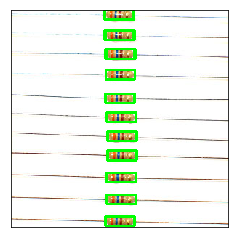

In [15]:
template_matching_x(resistor_template, resistors, 0.80)